## Extract and Reading the Social Metrics Dataset

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change file directory accordingly
automated_dataset = pd.read_csv('gdrive/MyDrive/BT4222/Data/Instagram/automated.csv')

In [ ]:
#duplicated columns
automated_dataset = automated_dataset.drop(columns= ['Unnamed: 0'])

In [ ]:
automated_dataset.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_comments_are_disabled,media_has_location_info,media_hashtag_numbers,media_like_numbers,mediaUpload_times,automated_behaviour
0,97,1612,7108,0,1,36,0.226787,133,12,0,"[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[1540847457, 1540744841, 1538410400, 153729214...",1
1,863,3028,912,1,0,77,3.320175,99,11,0,"[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[1542664246, 1542569444, 1542564418, 154211928...",1
2,149,5213,1157,1,1,56,4.505618,120,18,0,"[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[1543220394, 1542972220, 1542868998, 154278889...",1
3,33,12423,1763,0,0,2,7.046512,55,13,0,"[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[1543886933, 1543793413, 1543704343, 154344770...",1
4,1000,9496,2412,1,0,91,3.936982,33,8,0,"[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[1543939920, 1543699089, 1543187756, 154264414...",1


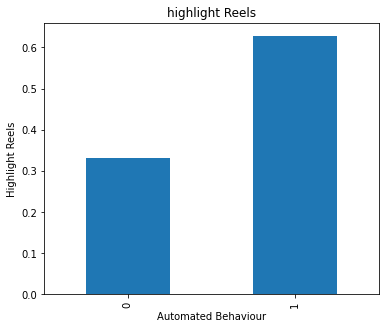

In [ ]:
dfg = automated_dataset.groupby(['automated_behaviour'])['user_has_highligh_reels'].mean()
dfg.plot(kind='bar', title='highlight Reels', ylabel='Highlight Reels',
         xlabel='Automated Behaviour', figsize=(6, 5))

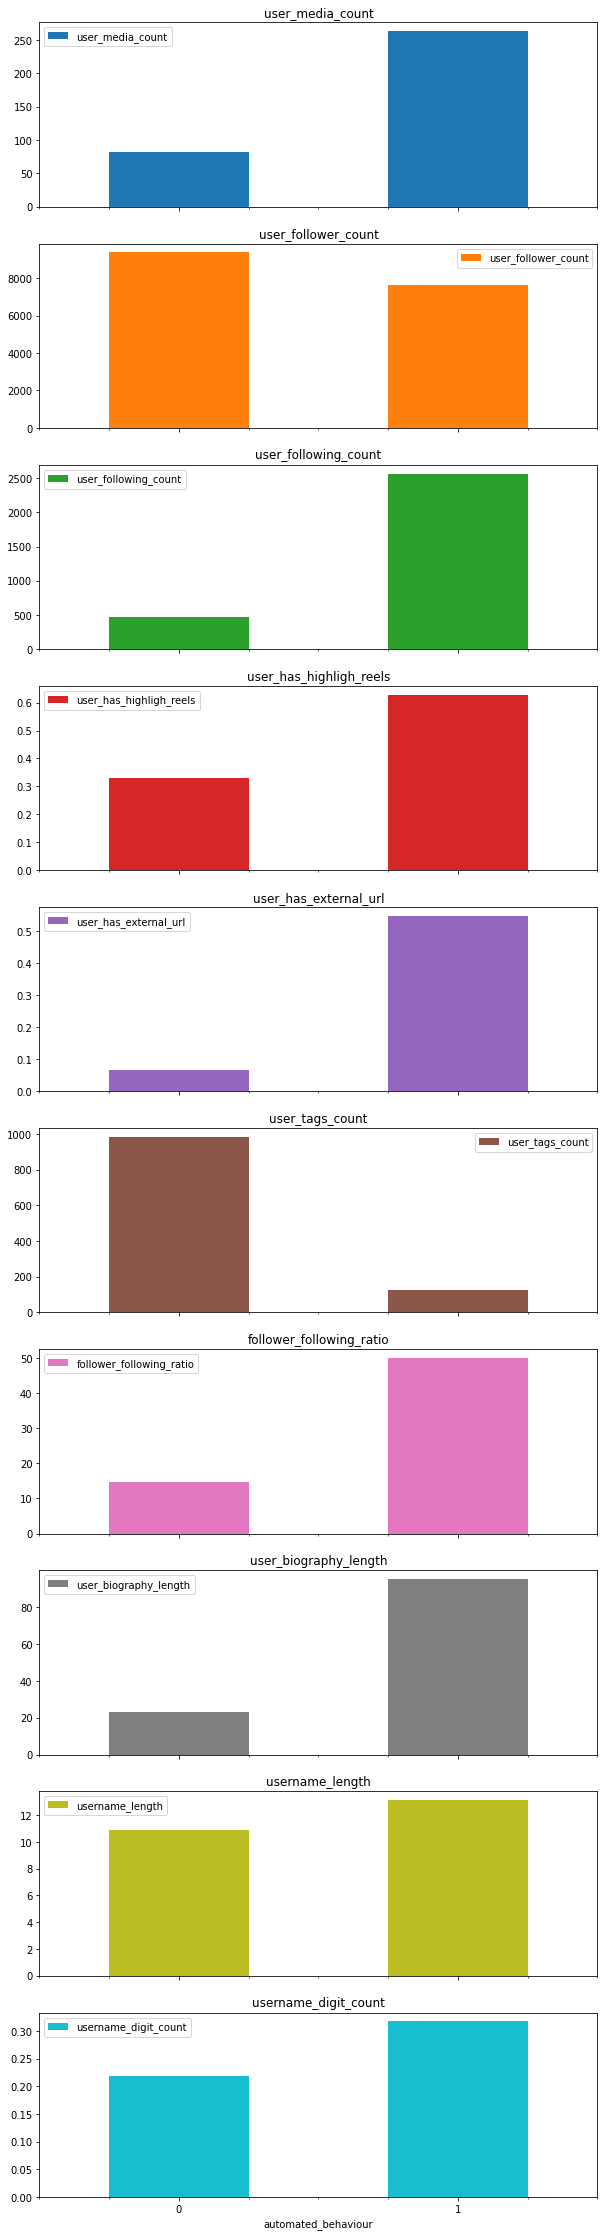

In [ ]:
res = automated_dataset.groupby('automated_behaviour').mean()
res.transpose()

ax = res.plot.bar(rot=0, subplots=True, figsize=(10, 40))

# Feature Engineering

Image data is stored in the following cols `media_comment_numbers`, `media_comments_are_disabled`, `media_has_location_info`, `media_hashtag_numbers`, `media_like_numbers`, `mediaUpload_times`. These columns store the data in arrays for each user, one element per post. We then aggregate these cols into an average by users.

Aggregation of media metadata
- Media comment numbers
- Media hashtag numbers
- Media like numbers
- Media upload times i.e. datetime of media posted


In [ ]:
import ast
from statistics import mean, mode

new_comments = []
avg_hashtag = []
avg_media_likes = []

for i in automated_dataset['media_comment_numbers']:
  new = ast.literal_eval(i)
  lst = list(map(int, new))
  if (len(lst) > 0):
    new_comments.append(mean(lst))
  else:
    new_comments.append(0)

for i in automated_dataset['media_hashtag_numbers']:
  new = ast.literal_eval(i)
  lst = list(map(int, new))
  if (len(lst) > 0):
    avg_hashtag.append(mean(lst))
  else:
    avg_hashtag.append(0)

for i in automated_dataset['media_like_numbers']:
  new = ast.literal_eval(i)
  lst = list(map(int, new))
  if (len(lst) > 0):
    avg_media_likes.append(mean(lst))
  else:
    avg_media_likes.append(0)

In [ ]:
#for binary feature
max_media_loc_info = []
for i in automated_dataset['media_has_location_info']:
  lst = ast.literal_eval(i)
  if (len(lst) > 0):
    max_media_loc_info.append(max(set(lst), key=lst.count))
  else:
    max_media_loc_info.append(0)

In [ ]:
automated_dataset['media_comment_numbers'] = new_comments
automated_dataset['media_hashtag_numbers'] = avg_hashtag
automated_dataset['media_like_numbers'] = avg_media_likes
automated_dataset['media_has_location_info'] = max_media_loc_info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


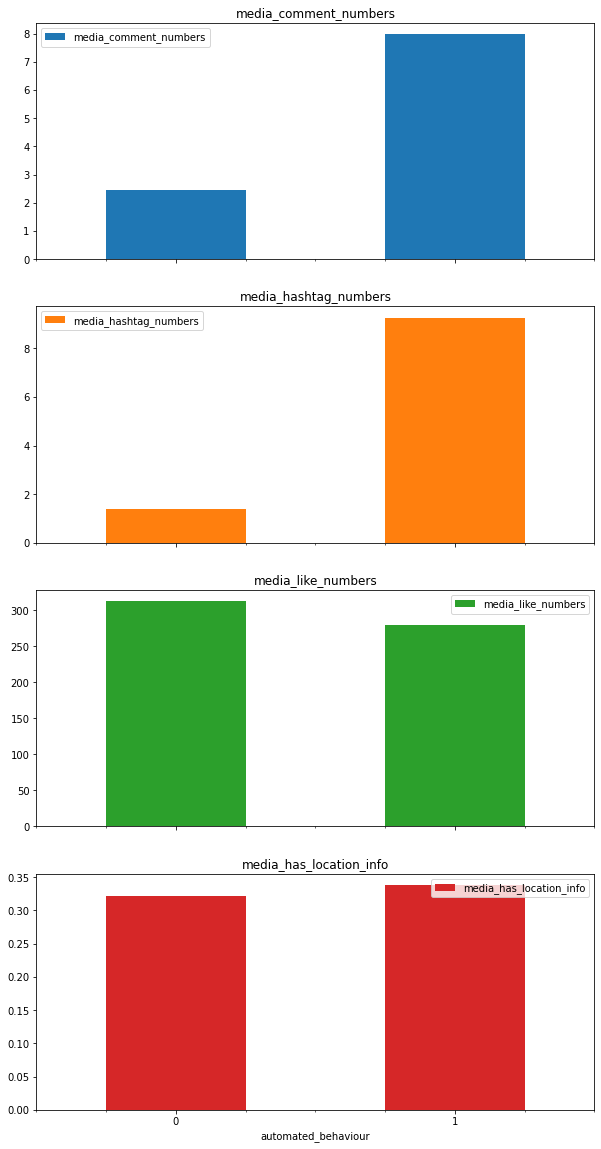

In [ ]:
res = automated_dataset.groupby('automated_behaviour')['media_comment_numbers', 'media_hashtag_numbers', 'media_like_numbers', 'media_has_location_info'].mean()
res.transpose()

ax = res.plot.bar(rot=0, subplots=True, figsize=(10, 20))

In [ ]:
from datetime import datetime
import time

time_posted = [] #convert to date object
date_posted = [] # date only
months = [] #extract month posted so we can get no.of postings per month
days = [] #extract max number of postings in a day
for i in automated_dataset['mediaUpload_times']:
  new = ast.literal_eval(i)
  lst = list(map(int, new))
  new_lst = []
  month = []
  day = []
  date_lst = []
  for date in lst:
    d = datetime.fromtimestamp(date)
    d_only = datetime.fromtimestamp(date).strftime('%Y/%m/%d')
    month.append(d.month)
    day.append(d.day)
    new_lst.append(d)
    date_lst.append(d_only)
  time_posted.append(new_lst)
  months.append(month)
  days.append(day)
  date_posted.append(date_lst)


In [ ]:
# convert timestamp to dates
automated_dataset['date_posted'] = date_posted
automated_dataset.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_comments_are_disabled,media_has_location_info,media_hashtag_numbers,media_like_numbers,mediaUpload_times,automated_behaviour,date_posted
0,97,1612,7108,0,1,36,0.226787,133,12,0,2.453608,"[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...",1,13.886598,55.041237,"[1540847457, 1540744841, 1538410400, 153729214...",1,"[2018/10/29, 2018/10/28, 2018/10/01, 2018/09/1..."
1,863,3028,912,1,0,77,3.320175,99,11,0,1.701043,"[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...",1,4.115875,61.212051,"[1542664246, 1542569444, 1542564418, 154211928...",1,"[2018/11/19, 2018/11/18, 2018/11/18, 2018/11/1..."
2,149,5213,1157,1,1,56,4.505618,120,18,0,2.026846,"[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...",0,10.302013,70.939597,"[1543220394, 1542972220, 1542868998, 154278889...",1,"[2018/11/26, 2018/11/23, 2018/11/22, 2018/11/2..."
3,33,12423,1763,0,0,2,7.046512,55,13,0,4.787879,"[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...",0,2.121212,65.181818,"[1543886933, 1543793413, 1543704343, 154344770...",1,"[2018/12/04, 2018/12/02, 2018/12/01, 2018/11/2..."
4,1000,9496,2412,1,0,91,3.936982,33,8,0,3.585000,"[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...",0,4.008000,160.267000,"[1543939920, 1543699089, 1543187756, 154264414...",1,"[2018/12/04, 2018/12/01, 2018/11/25, 2018/11/1..."


### Feature Engineering

Generate features that will be helpful to our model namely `max_per_day`, `avg_days_diff`, `avg_per_mo`, and `max_per_mo` using existing `mediaUpload_times` to track the activity of a user. These features look into the user's activity over different time periods (days vs months).

`max_per_day` - maximum daily number of posts per account  
`avg_days_diff` - number of days between with which posts are staggered  
`avg_per_mo`  - average number of posts per month per account  
`max_per_mo` - maximum number of posts in a month 


In [ ]:
from collections import Counter

max_ls = []
# getting max posts made per day by user
for i in automated_dataset['date_posted']:
    c = Counter(i) # generates a dict of unique date as key and their counts as value
    max_perday = [value for key, value in c.items() if value == max(c.values())] # ls of max_no for all dates with same max posts per day
    max_no = set(max_perday)   # get unique max no, i.e. by rgiht set would leave 1 element per user, retrieve that max no 
    max_ls.append(max_no.copy().pop() if len(max_no) != 0 else 0) # cannot pop empty sets, purpose is to convert back to int from set object

automated_dataset['max_per_day'] = max_ls
automated_dataset['max_per_day']

0        3
1        8
2        5
3        3
4       11
        ..
1395     2
1396     1
1397     1
1398     2
1399     1
Name: max_per_day, Length: 1400, dtype: int64

In [ ]:
# extracts unique mth_year from timestamp 
mth_year_ls = []
for i in automated_dataset['mediaUpload_times']:
  ls = []
  new = ast.literal_eval(i)
  lst = list(map(int, new))
  for j in lst: 
    mth_year = datetime.fromtimestamp(j).strftime("%Y-%b") # convert list of dates into MM/YY
    ls.append(mth_year)
  
  mth_year_ls.append(list(set(ls)))

automated_dataset['mmyy_posted'] = mth_year_ls
print(automated_dataset['mmyy_posted'])

0       [2017-Sep, 2017-Nov, 2018-Apr, 2018-Jan, 2015-...
1       [2017-Nov, 2017-Jan, 2015-Nov, 2015-Feb, 2015-...
2       [2017-Nov, 2017-Jan, 2018-Mar, 2016-Oct, 2016-...
3       [2018-Dec, 2018-Apr, 2017-Nov, 2018-Nov, 2018-...
4       [2017-Nov, 2017-Jan, 2015-Nov, 2015-Feb, 2015-...
                              ...                        
1395    [2013-Feb, 2015-Nov, 2015-Sep, 2015-May, 2015-...
1396    [2016-Jan, 2016-May, 2015-Oct, 2018-Nov, 2016-...
1397    [2014-Feb, 2014-Mar, 2013-Oct, 2014-Nov, 2014-...
1398    [2017-Nov, 2017-Jan, 2015-Nov, 2015-Feb, 2015-...
1399                                           [2015-Jul]
Name: mmyy_posted, Length: 1400, dtype: object


In [ ]:
# `posts_by_month` column collates number of posts for each month as a dictionary
posts_per_mo = []
for i in automated_dataset['mmyy_posted']: # for every user
  counts = {} 
  ls = []
  for j in i: # per unique mm_yy
    if j not in ls:
      ls.append(j)
      counts[j] = 1
    else:
      counts[j] += 1
  posts_per_mo.append(counts) 
automated_dataset['posts_by_month'] = posts_per_mo
print(automated_dataset['posts_by_month'])

0       {'2017-Sep': 1, '2017-Nov': 1, '2018-Apr': 1, ...
1       {'2017-Nov': 1, '2017-Jan': 1, '2015-Nov': 1, ...
2       {'2017-Nov': 1, '2017-Jan': 1, '2018-Mar': 1, ...
3       {'2018-Dec': 1, '2018-Apr': 1, '2017-Nov': 1, ...
4       {'2017-Nov': 1, '2017-Jan': 1, '2015-Nov': 1, ...
                              ...                        
1395    {'2013-Feb': 1, '2015-Nov': 1, '2015-Sep': 1, ...
1396    {'2016-Jan': 1, '2016-May': 1, '2015-Oct': 1, ...
1397    {'2014-Feb': 1, '2014-Mar': 1, '2013-Oct': 1, ...
1398    {'2017-Nov': 1, '2017-Jan': 1, '2015-Nov': 1, ...
1399                                      {'2015-Jul': 1}
Name: posts_by_month, Length: 1400, dtype: object


In [ ]:
# to get avg number of posts in a month per user
automated_dataset['avg_per_mo'] = automated_dataset['posts_by_month'].apply(lambda x: sum(x.values())/len(x) if len(x) != 0 else 0) # where x is a dict(k = mm/yy, v = counts) for ea user plus account for when dict empty
print(automated_dataset.groupby('automated_behaviour')['avg_per_mo'].mean()) # mean of avg_per_mo for all users -- im nto sure if looking at only mean is convincing enough

automated_behaviour
0    0.941429
1    0.982857
Name: avg_per_mo, dtype: float64


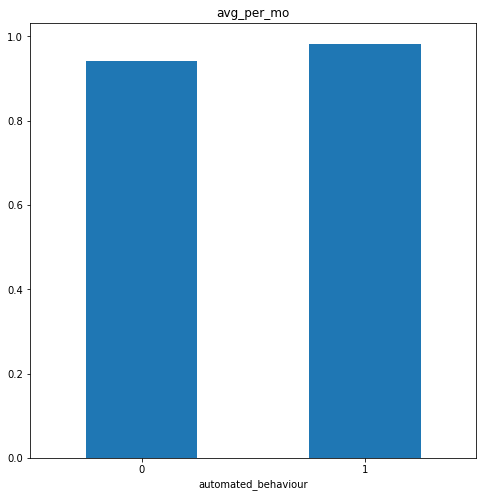

In [ ]:
res = automated_dataset.groupby('automated_behaviour')['avg_per_mo'].mean()
res.transpose()

ax = res.plot.bar(rot=0, subplots=True, figsize=(8, 8))

The created feature `avg_per_mo` is unlikely to be useful to our prediction looking at both the means and its distribution. To double check, we calculate the `max_per_mo` to see if the value differs from the average of 1 post per month.

In [ ]:
# From the above, we can see that avg_per_mo is usually just 1. Even when an average is applied across all users, it hovers at 0.962 close to 1. 
# The following code checks the distribution of max_per_mo. However, most if not all accounts also have only a maximum of 1 posts per month.
automated_dataset['max_per_mo'] = automated_dataset['posts_by_month'].apply(lambda x: max(x.values()) if len(x) != 0 else 0) 
print(automated_dataset.groupby('automated_behaviour')['max_per_mo'].mean())

automated_behaviour
0    0.941429
1    0.982857
Name: max_per_mo, dtype: float64


In [ ]:
# to get number of days between each post by user
days_between = []
for i in automated_dataset['mediaUpload_times']: 
  new = ast.literal_eval(i)
  lst = list(map(int, new)) 
  lst.sort() # sorts list of datetimes per user
  ls = []
  for x, y in zip(lst[0::], lst[1::]):
    diff = divmod(y-x,86400)[0] # divmod() returns quotient and remainder, [0] to get num of days, 86400 = seconds in a day
    ls.append(diff)
  days_between.append(ls)

automated_dataset['days_between'] = days_between
automated_dataset['days_between']

0       [0, 6, 66, 3, 0, 0, 0, 2, 552, 4, 0, 0, 1, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 1, 0, 88, 0, 0, 19, 74, 30, 0, 97, 1...
3       [8, 104, 11, 34, 22, 0, 14, 117, 7, 2, 4, 1, 1...
4       [0, 0, 0, 0, 1, 0, 0, 3, 6, 0, 0, 0, 0, 0, 0, ...
                              ...                        
1395    [0, 121, 6, 183, 137, 20, 56, 4, 71, 25, 59, 3...
1396           [6, 66, 28, 84, 25, 82, 8, 3, 847, 28, 25]
1397            [103, 14, 27, 34, 23, 48, 11, 76, 45, 13]
1398    [4, 1, 37, 26, 28, 0, 51, 9, 18, 3, 14, 26, 2,...
1399                                                   []
Name: days_between, Length: 1400, dtype: object

In [ ]:
# uses `days_between` (ls) to get the `avg_days_diff` (1 value) per user
automated_dataset['avg_days_diff'] = automated_dataset['days_between'].apply(lambda x: round(sum(x)/len(x)) if len(x)!=0 else 0)
automated_dataset['avg_days_diff']

0        11
1         1
2         5
3        12
4         1
       ... 
1395     85
1396    109
1397     39
1398     14
1399      0
Name: avg_days_diff, Length: 1400, dtype: int64

## Data Exploration for Features

In [ ]:
automated_dataset.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,...,mediaUpload_times,automated_behaviour,date_posted,max_per_day,mmyy_posted,posts_by_month,avg_per_mo,max_per_mo,days_between,avg_days_diff
0,97,1612,7108,0,1,36,0.226787,133,12,0,...,"[1540847457, 1540744841, 1538410400, 153729214...",1,"[2018/10/29, 2018/10/28, 2018/10/01, 2018/09/1...",3,"[2018-Oct, 2016-Feb, 2018-Jan, 2016-Jan, 2017-...","{'2018-Oct': 1, '2016-Feb': 1, '2018-Jan': 1, ...",1.0,1,"[0, 6, 66, 3, 0, 0, 0, 2, 552, 4, 0, 0, 1, 0, ...",11
1,863,3028,912,1,0,77,3.320175,99,11,0,...,"[1542664246, 1542569444, 1542564418, 154211928...",1,"[2018/11/19, 2018/11/18, 2018/11/18, 2018/11/1...",8,"[2016-May, 2017-Dec, 2018-May, 2015-Sep, 2018-...","{'2016-May': 1, '2017-Dec': 1, '2018-May': 1, ...",1.0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1
2,149,5213,1157,1,1,56,4.505618,120,18,0,...,"[1543220394, 1542972220, 1542868998, 154278889...",1,"[2018/11/26, 2018/11/23, 2018/11/22, 2018/11/2...",5,"[2017-Dec, 2018-May, 2018-Feb, 2018-Mar, 2016-...","{'2017-Dec': 1, '2018-May': 1, '2018-Feb': 1, ...",1.0,1,"[0, 0, 0, 1, 0, 88, 0, 0, 19, 74, 30, 0, 97, 1...",5
3,33,12423,1763,0,0,2,7.046512,55,13,0,...,"[1543886933, 1543793413, 1543704343, 154344770...",1,"[2018/12/04, 2018/12/02, 2018/12/01, 2018/11/2...",3,"[2018-Dec, 2018-Oct, 2018-May, 2018-Jun, 2017-...","{'2018-Dec': 1, '2018-Oct': 1, '2018-May': 1, ...",1.0,1,"[8, 104, 11, 34, 22, 0, 14, 117, 7, 2, 4, 1, 1...",12
4,1000,9496,2412,1,0,91,3.936982,33,8,0,...,"[1543939920, 1543699089, 1543187756, 154264414...",1,"[2018/12/04, 2018/12/01, 2018/11/25, 2018/11/1...",11,"[2016-May, 2014-Feb, 2017-Dec, 2018-May, 2014-...","{'2016-May': 1, '2014-Feb': 1, '2017-Dec': 1, ...",1.0,1,"[0, 0, 0, 0, 1, 0, 0, 3, 6, 0, 0, 0, 0, 0, 0, ...",1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbd3ebf310>,
      dtype=object)

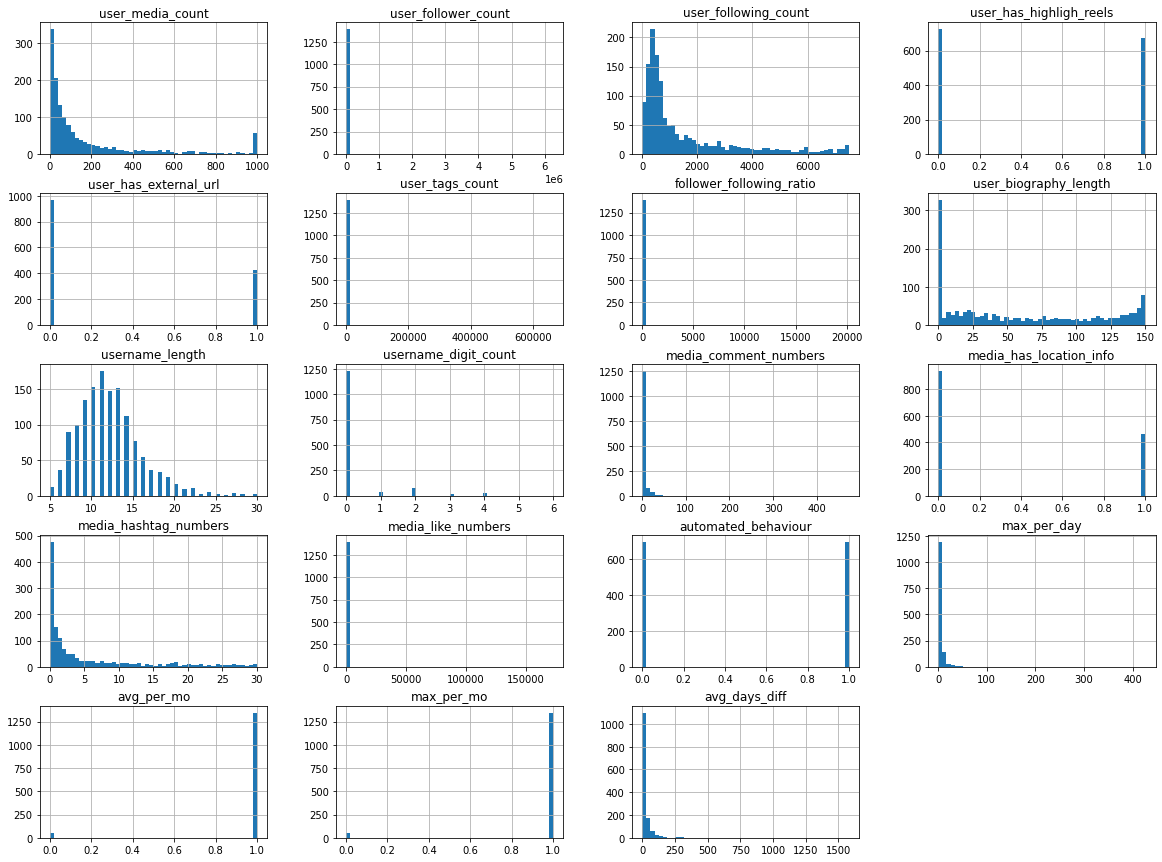

In [ ]:
automated_dataset.hist(bins=50, figsize=(20,15))

In [ ]:
# automated bots tend to hover at mean of 7 days between posts, with much lower variation (std) around this mean. 
automated_dataset.groupby('automated_behaviour')['avg_days_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
automated_behaviour,,,,,,,,
0,700.0,44.732857,99.294169,0.0,10.0,23.0,48.0,1582.0
1,700.0,7.100000,12.676282,0.0,1.0,3.0,7.0,105.0


Automated bots post once every **7** days on average compared to humans which posts every **44** days.  
This coincides with the hypothesis that automated bots posts more frequently. 

In [ ]:
# automated bots are more likely to post much more (with max at 426) within a day
automated_dataset.groupby('automated_behaviour')['max_per_day'].describe()

,count,mean,std,min,25%,50%,75%,max
automated_behaviour,,,,,,,,
0,700.0,2.607143,2.959180,0.0,1.0,2.0,3.0,41.0
1,700.0,7.997143,19.464946,0.0,2.0,4.0,9.0,426.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3179be1e10>,
      dtype=object)

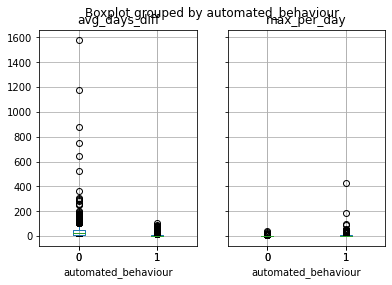

In [ ]:
automated_dataset.boxplot(column=['avg_days_diff', 'max_per_day'], by='automated_behaviour')

#### Correlation Analysis

In [ ]:
corr_df = automated_dataset.drop(columns= ['mediaUpload_times', 'date_posted', 'mmyy_posted', 'days_between', 'posts_by_month', 'avg_per_mo', 'media_comments_are_disabled']) # drop helper cols

In [ ]:
corr_df.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_has_location_info,media_hashtag_numbers,media_like_numbers,automated_behaviour,max_per_day,max_per_mo,avg_days_diff
0,97,1612,7108,0,1,36,0.226787,133,12,0,2.453608,1,13.886598,55.041237,1,3,1,11
1,863,3028,912,1,0,77,3.320175,99,11,0,1.701043,1,4.115875,61.212051,1,8,1,1
2,149,5213,1157,1,1,56,4.505618,120,18,0,2.026846,0,10.302013,70.939597,1,5,1,5
3,33,12423,1763,0,0,2,7.046512,55,13,0,4.787879,0,2.121212,65.181818,1,3,1,12
4,1000,9496,2412,1,0,91,3.936982,33,8,0,3.585000,0,4.008000,160.267000,1,11,1,1


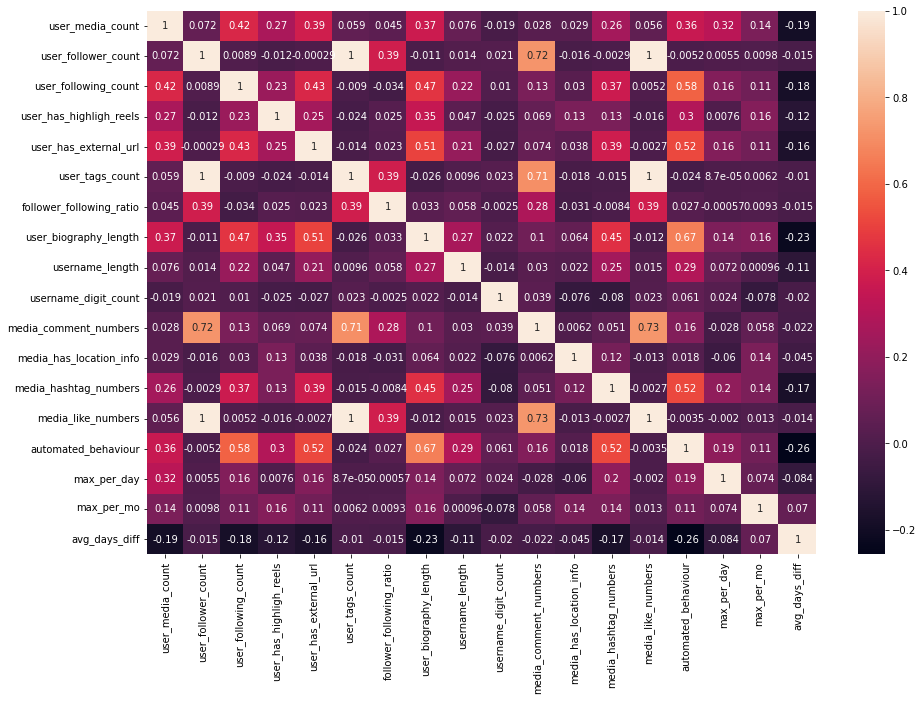

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_df.corr(), annot=True)
plt.show()

From the correlation heatmap, we see that the features `user_biography_length`, `user_following_count`, `user_has_external_url`,`media_hashtag_numbers` have comparably stronger positive correlation with automated_behavior.

## Data Preparation

In [ ]:
X = automated_dataset.drop(columns= ['automated_behaviour','mediaUpload_times', 'date_posted', 'mmyy_posted', 'days_between', 'posts_by_month', 'avg_per_mo', 'media_comments_are_disabled'])
y = automated_dataset['automated_behaviour']

In [ ]:
X.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_has_location_info,media_hashtag_numbers,media_like_numbers,max_per_day,avg_days_diff,max_per_mo
0,97,1612,7108,0,1,36,0.226787,133,12,0,2.453608,1,13.886598,55.041237,3,11,1
1,863,3028,912,1,0,77,3.320175,99,11,0,1.701043,1,4.115875,61.212051,8,1,1
2,149,5213,1157,1,1,56,4.505618,120,18,0,2.026846,0,10.302013,70.939597,5,5,1
3,33,12423,1763,0,0,2,7.046512,55,13,0,4.787879,0,2.121212,65.181818,3,12,1
4,1000,9496,2412,1,0,91,3.936982,33,8,0,3.585000,0,4.008000,160.267000,11,1,1


In [ ]:
X_no_new_features = X.drop(columns=['avg_days_diff', 'max_per_mo', 'max_per_day', 'media_comment_numbers', 'media_has_location_info', 'media_hashtag_numbers', 'media_like_numbers'])
y_no_new_features = automated_dataset['automated_behaviour']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_no_new_features, y_no_new_features, test_size=0.2, random_state=0, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(solver="lbfgs", random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
log_clf.fit(X_train_2, y_train_2)
y_pred_normal = log_clf.predict(X_test_2)
print(accuracy_score(y_test, y_pred_normal))

0.8714285714285714


# Ensemble Learning
XGBoost, Random Forest Classifier, Logistic Regression, SVM and Voting Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

model_xgb = XGBClassifier()
rnd_clf = RandomForestClassifier()
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
voting_clf = VotingClassifier(estimators=[('forest', rnd_clf), ('xgb', model_xgb),('lr', log_clf),('svc', svm_clf)]) 

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

for clf in (model_xgb, log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.9535714285714286
LogisticRegression 0.9035714285714286
RandomForestClassifier 0.9428571428571428
SVC 0.6071428571428571
VotingClassifier 0.9357142857142857


# Hyperparameter Tuning

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rnd_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
best_params = grid_result.best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948512 using {'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
CPU times: user 1min 25s, sys: 5.88 s, total: 1min 31s
Wall time: 1h 44min 54s


In [ ]:
%%time
from sklearn.metrics import classification_report
rnd_clf_new = RandomForestClassifier(n_estimators=300, bootstrap=True, max_depth = 100, min_samples_leaf = 3, min_samples_split = 8, max_features = 2, random_state=42)
rnd_clf_new.fit(X_train, y_train)
y_pred_new = rnd_clf_new.predict(X_test)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       140
           1       0.95      0.94      0.94       140

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280

CPU times: user 566 ms, sys: 2.25 ms, total: 568 ms
Wall time: 570 ms


Bagging random forest classifier to reduce overfitting

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    rnd_clf_new, n_estimators=500,
    bootstrap=True, oob_score=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print("Accuracy score: %f" % accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))
print("Out of bag evaluation score: %f" % bag_clf.oob_score_)

Accuracy score: 0.942857
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       140
           1       0.95      0.94      0.94       140

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280

Out of bag evaluation score: 0.946429


### XGBoost Classifier

We included the regularization of parameters to control model complexity such as `reg_alpha`, `reg_lambda`, and `gamma` in the subsequent hyperparameter tuning for XGB. This helps to reduce the issue of  overfitting for XGB models.

In [ ]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

xgb_clf = XGBClassifier()
grid = {"n_estimators": (10, 100),
                'max_depth': (5, 40),
                'reg_alpha': (0.0, 0.1), #  reduces overfitting 
                'reg_lambda': (0.0, 0.1), # reduce overfitting
                'min_child_weight': (1, 10),
                "gamma": (0, 10), # reduce overfitting
                'subsample':[i/10.0 for i in range(6,10)],
                'colsample_bytree':[i/10.0 for i in range(6,10)]
                }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
best_params = grid_result.best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.955952 using {'colsample_bytree': 0.9, 'gamma': 0, 'max_depth': 40, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.1, 'subsample': 0.7}
CPU times: user 1min 45s, sys: 3.88 s, total: 1min 49s
Wall time: 32min 43s


In [ ]:
%%time
xgb_clf_new = XGBClassifier(colsample_bytree= 0.9, gamma = 0, max_depth= 40, min_child_weight= 1, n_estimators= 100, reg_alpha= 0.0, reg_lambda= 0.1, subsample= 0.7)
xgb_clf_new.fit(X_train,y_train)
y_pred_new = xgb_clf_new.predict(X_test)
print(accuracy_score(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

0.95
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       140
           1       0.96      0.94      0.95       140

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280

CPU times: user 188 ms, sys: 17.1 ms, total: 206 ms
Wall time: 297 ms


XGB Analysis

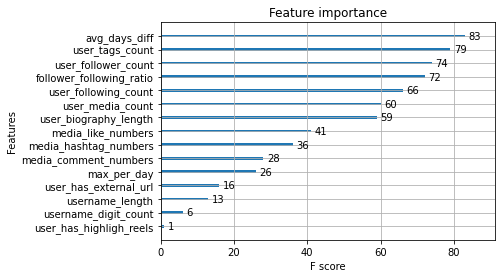

In [ ]:
import xgboost as xgb

xgb.plot_importance(model_xgb, importance_type='weight')

Random Forest Analysis

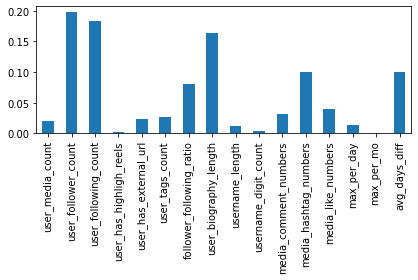

In [ ]:
import matplotlib.pyplot as plt
impt = rnd_clf.feature_importances_
feature_names = [col for col in X.columns]
forest_importances = pd.Series(impt, index = feature_names)
fig, ax = plt.subplots()

forest_importances.plot.bar(ax=ax)
fig.tight_layout()

The above feature importance analyses supoorts findings from our initial correlations analysis that the features `user_biography_length`, `user_following_count` and `media_hashtag_numbers` have stronger correlation with automated behavior. Other features highly ranked in importance for both RF and XGB include `avg_days_diff`, `user_follower_count`, `follower_following_ratio`.   